# Varying types of criminal activity during the day #

Understanding how the reported criminal activity varies during a typical day is an important factor in deciding when to make which law enforcement resources available. When crimes reported during the night are different from the type of crime reported in the afternoon, it is important that a sufficient number officers with relevant expertise are available.

For this reported we looked at crimes reported in the summer of 2014, in the city of San Francisco. Though in this report we will only focus on how the type of crime varies during the hours of the day, further analysis is required on the variation over the year (seasonal) and over the various parts of town.


#### Importing libraries ####

Before starting, some libraries need to be imported.

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Reading the data and dropping some columns we are not interested in for this report ####

In [99]:
sf = pd.read_csv("./sanfrancisco_incidents_summer_2014.csv")
sf.drop(['Address', 'IncidntNum', 'Descript', 'Location', 'X', 'Y', 'PdDistrict' ,'PdId'], axis=1, inplace=True)

#### Use hour of crime, not exact time ####

As we are not interested in the exact minute of the day a crime was reported, we will instead look at the hour only. The column 'x' is added for calculations.

In [100]:
sf['Hour'] = sf.apply(lambda row: row['Time'][0:2], axis=1)
sf.drop(['Time'], axis=1, inplace=True)
sf['x'] = 1

## Overall criminal activity during the day ##

In order to compare how certain crime types differ from the overall criminal activity in San Francisco, we plot first the percentage of all criminal activities reported per hour, without looking at the specific category of crime. 

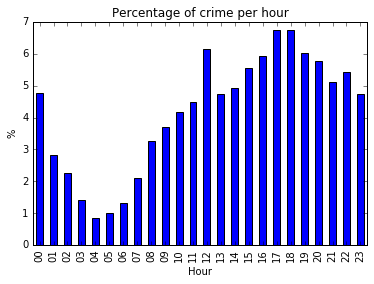

In [101]:
gb = sf.groupby(["Hour"]).sum().apply(lambda x: 100*x/float(x.sum()))
gb[['x']].plot(kind='bar', legend=None, title="Percentage of crime per hour").set_ylabel("%")

### Specific categories of crime, and how they vary during the day ###

Now that we have an impression of how overall criminal activity looks like in San Francisco, let us have a look at some specific categories and compare the results. There are 34 categories available, but we will limit this report to a small subset of these. The following categories have been selected:

* Larceny/theft
* Missing person
* Fraud
* Driving under the influence
* Kidnapping

The large difference between some of the categories assumably will give rise to different patterns during the day.

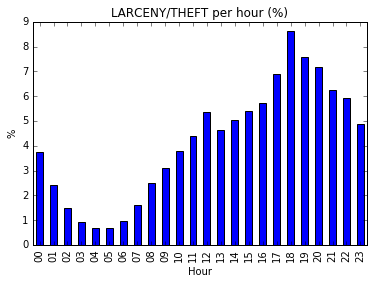

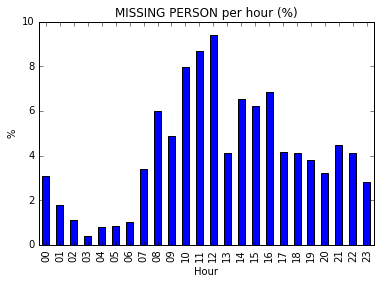

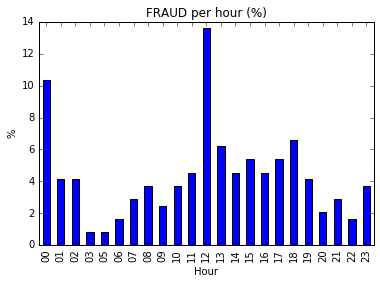

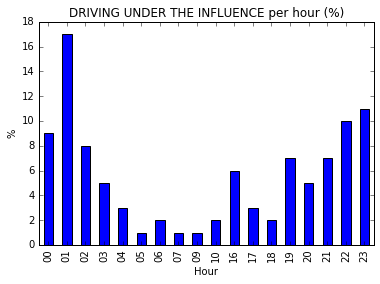

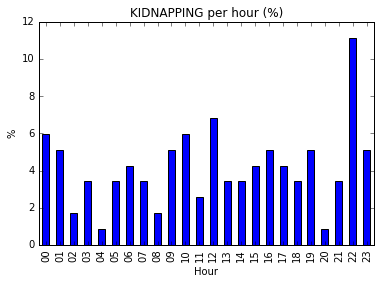

In [113]:
categories = ('LARCENY/THEFT', 'MISSING PERSON', 'FRAUD', 'DRIVING UNDER THE INFLUENCE', 'KIDNAPPING')

for category in categories:
    table = sf[sf['Category']==category]
    gb = table.groupby(["Hour"]).sum().apply(lambda x: 100*x/float(x.sum()))
    gb[['x']].plot(kind='bar', legend=None, title=category + " per hour (%)").set_ylabel("%")


As can be seen from these graphs, different categories indeed show different spreads over the day.

The fact that **Larceny/theft** is similar to the overall picture can be contributed to it being the largest, most common category and therefore dominating the overall statistics. 

**Missing persons** and **Fraud** are clearly more reported during normal office hours. This might reflect when these crimes are reported rather than when they are committed. Persons gone missing during the night, will probably not be reported missing until next morning. And fraud is typically detected during office hours.

**Driving under the influence** is more reported during late evening, night and early morning. Which can be easily explained by opening hours of clubs and bars, and by the fact that during office hours most people do not drink (excessively).

**Kidnapping** has a high peak around 10 PM, and is otherwise an activity reported throughout the day.

## Conclusions ##

The idea that different hours of the day see different categories of crime reported is confirmed by the examples shown in this report. As stated this does not necessarily reflect when the crimes are committed, but rather when they are reported and demand attention from law enforcement officers.

This report thus gives a clear indication that officers with different profiles and expertises might be made available at different hours of the day. Of course more research is required, especially apart from the hour of day, a very important factor will most likely be the location within the city. 